# SQL + Análisis exploratorio de datos

## 1. Preparación de los datos

Se importarán los datasets para convertirlos en un DataFrame. Una vez que se tengan los DataFrames se buscarán valores repetidos, valores ausentes y si es requerido, se cambiará el tipo de datos.

In [1]:
# Importación de librerías
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st

C:\Users\juan_\AppData\Local\Temp\ipykernel_31528\644071453.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Leer los datasets
cabs_df = pd.read_csv('datasets/moved_project_sql_result_01.csv')
chicago_trips_df = pd.read_csv('datasets/moved_project_sql_result_04.csv')
airport_trips_df = pd.read_csv('datasets/moved_project_sql_result_07.csv')

* `cabs_df` contiene el nombre de la empresa de taxis y el número de viajes de cada compañía de taxis el 15 y 16 de noviembre de 2017.
* `chicago_trips_df` contiene los barrios de Chicago donde finalizaron los viajes y el promedio de viajes que terminaron en cada barrio en noviembre de 2017.
* `airport_trips_df` contiene el resultado de la última consulta y los datos sobre viajes desde el Loop hasta el Aeropuerto Internacional O'Hare. 

En cada DF se hará uso de los métodos `sample()`, `info()` y `describe()` para tener información preliminar de cada uno y se buscarán valores duplicados

### 1.1. Información de `cabs_df`

In [3]:
# Se despliegan los métodos sample, info y describe
display(cabs_df.sample(3))
cabs_df.info()
print()
print(cabs_df.describe())

,company_name,trips_amount
37,1469 - 64126 Omar Jada,36
19,Chicago Medallion Leasing INC,1607
31,American United Taxi Affiliation,210


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB

       trips_amount
count     64.000000
mean    2145.484375
std     3812.310186
min        2.000000
25%       20.750000
50%      178.500000
75%     2106.500000
max    19558.000000


In [4]:
print(cabs_df[cabs_df.duplicated()].sum())

company_name    0
trips_amount    0
dtype: object


Conclusiones: La tabla sólo contiene 2 columnas y ninguna contiene valores ausentes. También se observa que el tipo de datos es correcto y no hay filas repetidas.

Se observa que la columna `'trips_amount'` tiene una desviación estándar alta y una diferencia muy grande entre el valor mínimo y máximo por lo que se puede decir que es probable que haya compañías de taxis que hagan menos viajes que otras.

### 1.2. Información de `chicago_trips_df`

In [5]:
# Se despliegan los métodos sample, info y describe
display(chicago_trips_df.sample(3))
chicago_trips_df.info()
print()
print(chicago_trips_df.describe())

,dropoff_location_name,average_trips
89,Mount Greenwood,3.137931
38,Armour Square,77.033333
83,Avalon Park,6.966667


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB

       average_trips
count      94.000000
mean      599.953728
std      1714.591098
min         1.800000
25%        14.266667
50%        52.016667
75%       298.858333
max     10727.466667


In [6]:
print(chicago_trips_df.duplicated().sum())

0


Conclusiones: La tabla sólo contiene 2 columnas y ninguna contiene valores ausentes. También se observa que el tipo de datos es correcto y no hay filas repetidas.

Se observa que la columna `'average_trips'` tiene una desviación estándar alta y una diferencia muy grande entre el valor mínimo y máximo. Se puede decir que hay barrios en chicago en los que llegan más viajes.

### 1.3. Información de `airport_trips_df`

In [7]:
# Se despliegan los métodos sample, info y describe
display(airport_trips_df.sample(3))
airport_trips_df.info()
print()
print(airport_trips_df.describe())

,start_ts,weather_conditions,duration_seconds
462,2017-11-04 05:00:00,Good,1200.0
146,2017-11-11 14:00:00,Good,2340.0
52,2017-11-18 12:00:00,Bad,2460.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB

       duration_seconds
count       1068.000000
mean        2071.731273
std          769.461125
min            0.000000
25%         1438.250000
50%         1980.000000
75%         2580.000000
max         7440.000000


In [8]:
print(airport_trips_df.duplicated().sum())

197


Conclusiones: La tabla tiene 3 columnas y ninguna contiene valores ausentes. Se cambiará el tipo de datos de la columna `'start_ts` a `datetime`. Podemos ver que la tabla tiene 197 datos duplicados, pero no serán eliminados debido a que es muy probable que se hayan hecho viajes al aeropuerto al mismo tiempo porque es un lugar al que las personas van muy seguido.

En la columna `'duration_seconds'` se tiene una desviación estándar alta. Se puede observar que el valor mínimo es de 0.

In [9]:
# Cambia el tipo de dato de la columna start_ts
airport_trips_df['start_ts'] = pd.to_datetime(airport_trips_df['start_ts'])
airport_trips_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 25.2+ KB


## 2. Análisis exploratorio de datos

### 2.1. Barrios principales de Chicago

¿Cuáles son los 10 barrios que tienen más número de finalizaciones de recorridos de taxis? Se va a hacer una gráfica de barras para tener una apreciación visual.

In [10]:
# Se ordena por la columna average_trips
main_chicago_trips = chicago_trips_df.sort_values(by='average_trips', ascending=False).head(10)
display(main_chicago_trips)

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


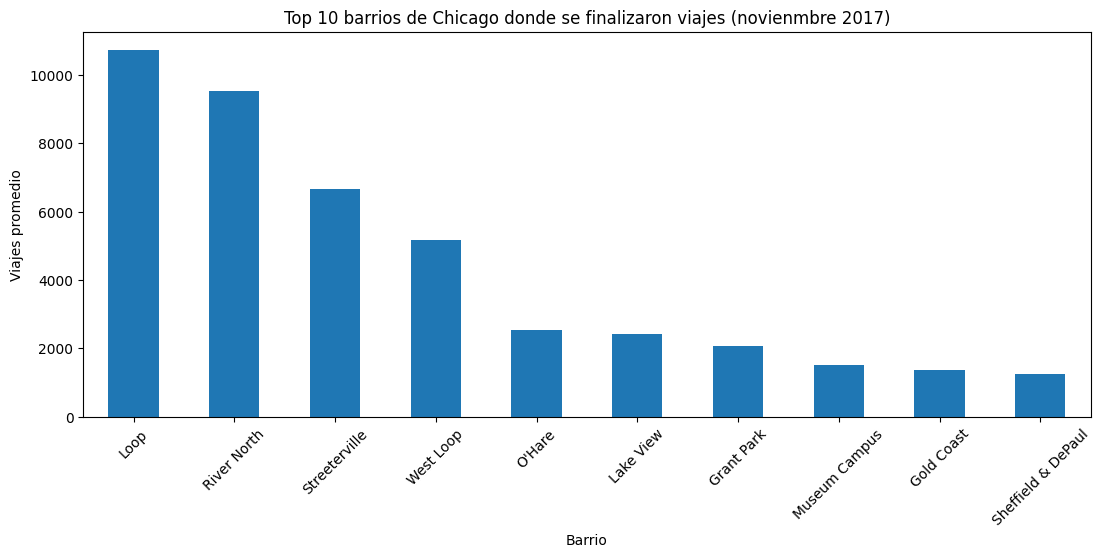

In [11]:
# Crea un gráfico de barras
main_chicago_trips.plot(kind='bar', x='dropoff_location_name', figsize=(13, 5), legend = None)
plt.xlabel('Barrio')
plt.ylabel('Viajes promedio')
plt.title('Top 10 barrios de Chicago donde se finalizaron viajes (novienmbre 2017)')
plt.xticks(rotation=45)

plt.show()

Conclusiones:

El barrio de Loop es el que tiene el mayor número promedio de viajes que han finalizado, el cual supera los 10000 viajes. Los usuarios de taxis tienen preferencia por ir a Loop.

En el gráfico se ve que a partir del barrio de O'Hare, hacia la derecha los viajes promedio disminuyen pero sin que se aprecie una diferencia grande entre cada uno. Posiblemente los barrios de Loop, River North, Streeterville y West Loop son barrios turísticos.

### 2.2. Empresas de taxis

¿Cuáles son las 10 empresas de taxis que tienen más números de viajes?

In [12]:
# Se ordena por la columna trips_amount
cabs_ordered_df = cabs_df.sort_values(by='trips_amount', ascending=False).head(10)
display(cabs_ordered_df)

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


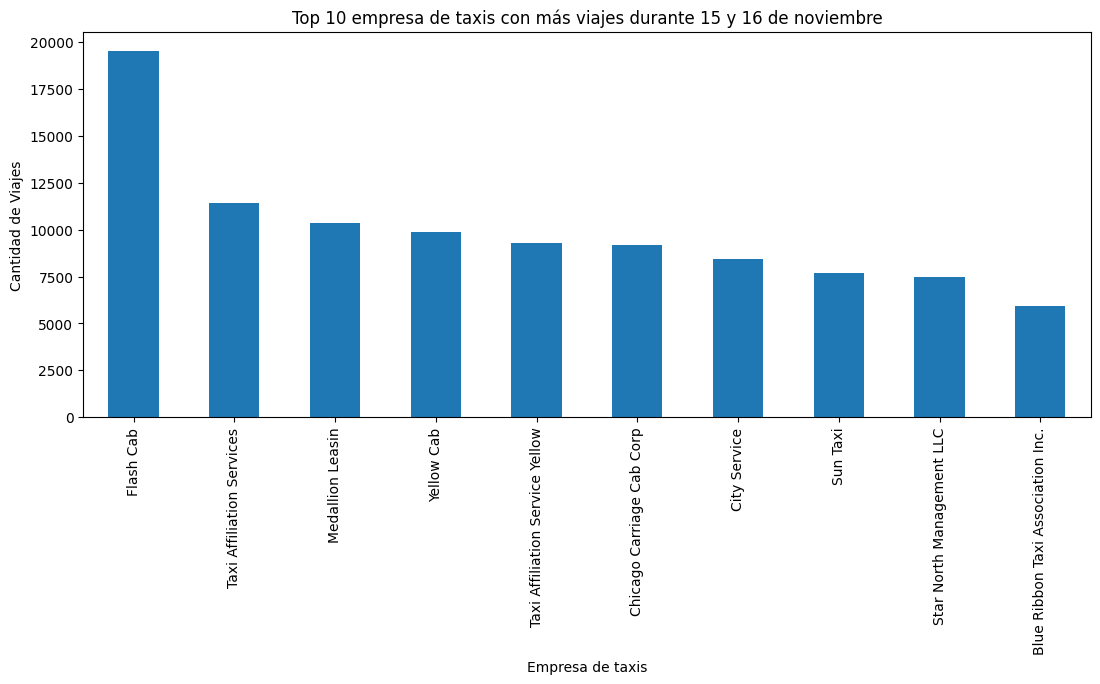

In [13]:
# Crea un gráfico de barras
cabs_ordered_df.plot(kind='bar', x='company_name', figsize=(13, 5), legend = None)
plt.xlabel('Empresa de taxis')
plt.ylabel('Cantidad de Viajes')
plt.title('Top 10 empresa de taxis con más viajes durante 15 y 16 de noviembre')

plt.show()

Conclusiones:

Flash Cab es la empresa favorita por los usuarios, ya que durante los días 15 y 16 de noviembre sumaron casi 20000 viajes. Taxi Affiliation Services es la segunda con poco más de 11 viajes sumados. Casi es el doble la diferencia entre la primera y segunda empresa.

Con lo visto en la gráfica anterior es posible que Flas Cab sea la empresa que tuvo más rutas hacia el barrio de Loop.

## 3. Prueba de hipótesis

Para esta prueba de hipótesis se va a ocupar el DataFrame `airport_trips_df` que contiene el dataset de la última consulta sobre los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare. Queremos probar la siguiente hipótesis:

"La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos"

Para lograrlo, sabemos que en la columna ``weather_conditions`` los días lluviosos se encuentran como ``'Bad'``, y podemos buscar los días sábado en la columna ``start_ts``. Con esto podemos hacer dos muestras y utilizar la hipótesis sobre la igualdad de las medias de dos poblaciones.

Nuestras hipótesis quedan:
* Hipótesis nula: La duración promedio de los viajes en sábados lluviosos es igual a la de los sábados soleados.
* Hipótesis eltrnativa: La duración promedio de los viajes en sábados lluviosos es diferente a la de los sábados soleados.

In [14]:
# Se filtra para que haya valores sólo los sabados lluviosos
rainy_saturday = airport_trips_df[(airport_trips_df['start_ts'].dt.weekday == 5) & (airport_trips_df['weather_conditions'] == 'Bad')]

# Se filtra para que haya valores sólo los sabados soleados
sunny_saturday = airport_trips_df[(airport_trips_df['start_ts'].dt.weekday == 5) & (airport_trips_df['weather_conditions'] == 'Good')]

Con estos dos DataFrames filtrados podemos tomar las muestras a usar, las cuales serán las columnas ``duration_seconds``.

Se tomará un alpha de 0.05

In [15]:
sample_1 = rainy_saturday['duration_seconds']
sample_2 = sunny_saturday['duration_seconds']

alpha = 0.05

results = st.ttest_ind(sample_1, sample_2)
print('valor p:', results.pvalue)

if results.pvalue < alpha:
    print('Rechazamos la hipótesis nula')
else:
    print('No podemos rechazar la hipótesis nula')

valor p: 6.517970327099473e-12
Rechazamos la hipótesis nula


Conclusion:

El valor p es muy pequeño. Podemos decir que si hay diferencia de la duración de los viajes en lo sábados lluviosos en comparación con los sábados soleados